In [4]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import random 

plt.style.use(['science', 'retro', 'grid'])

import sys
import cvxopt as opt
sys.path.insert(0, os.path.abspath('../../src/rl/dirichlet/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(1, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [5]:
import importlib
importlib.reload(sys.modules['EfficientFrontier'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['Harness'])
importlib.reload(sys.modules['ParallelRunner'])
importlib.reload(sys.modules['DirichletPolicy'])
importlib.reload(sys.modules['ParallelRunner'])

<module 'ParallelRunner' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dirichlet/ParallelRunner.py'>

In [6]:
from GenerativeMarketEnv import GenerativeMarketEnv
from DirichletPolicy import DirichletPolicy
from Harness import Harness
from ParallelRunner import ParallelRunner
from EfficientFrontier import EfficientFrontier
from MarketFactory import MarketFactory

# Maximising Returns of Real Stocks

In [8]:
stocks = ['AAPL' ,'ADBE' ,'ADI' ,'ADP' ,'ADSK' ,'AEP' ,'ALGN' ,'ALXN' ,'AMAT' ,'AMD' ,'AMGN' ,'AMZN' ,'ANSS' ,'ASML' ,'ATVI'
 ,'AVGO' ,'BIDU' ,'BIIB' ,'BKNG' ,'CDNS' ,'CDW' ,'CERN' ,'CHKP' ,'CHTR' ,'CMCSA' ,'COST' ,'CPRT' ,'CSCO' ,'CSX' ,'CTAS'
 ,'CTSH' ,'DLTR' ,'DOCU' ,'DXCM' ,'EA' ,'EBAY' ,'EXC' ,'FAST' ,'FB' ,'FISV' ,'FOX' ,'FOXA' ,'GILD' ,'GOOG' ,'GOOGL'
 ,'IDXX' ,'ILMN' ,'INCY' ,'INTC' ,'INTU' ,'ISRG' ,'JD' ,'KDP' ,'KHC' ,'KLAC' ,'LRCX' ,'LULU' ,'MAR' ,'MCHP' ,'MDLZ'
 ,'MELI' ,'MNST' ,'MRNA' ,'MRVL' ,'MSFT' ,'MTCH' ,'MU' ,'MXIM' ,'NFLX' ,'NTES' ,'NVDA' ,'NXPI' ,'OKTA' ,'ORLY' ,'PAYX'
 ,'PCAR' ,'PDD' ,'PEP' ,'PTON' ,'PYPL' ,'QCOM' ,'REGN' ,'ROST' ,'SBUX' ,'SGEN' ,'SIRI' ,'SNPS' ,'SPLK' ,'SWKS' ,'TCOM'
 ,'TEAM' ,'TMUS' ,'TSLA' ,'TXN' ,'VRSK' ,'VRSN' ,'VRTX' ,'WBA' ,'WDAY' ,'XEL' ,'XLNX' ,'ZM']

## 10 Stocks

[*********************100%***********************]  10 of 10 completed


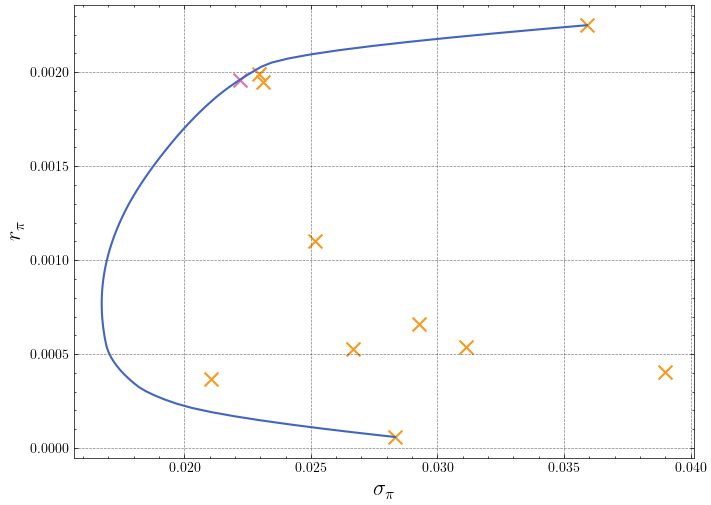

0.08828294870439875

In [9]:
random.shuffle(stocks)
sampled_stocks = stocks[:10]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [10]:
params = {
    'n_assets': len(sampled_stocks),
    'α': 3,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 7500
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 56.65it/s]
0it [02:16, ?it/s]


KeyboardInterrupt: 

In [ ]:
market.plot_efficient_frontier(stds = stds, returns = means)

In [109]:
params = {
    'n_assets': len(sampled_stocks),
    'α': 3,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 7500
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 63.14it/s]
1it [05:17, 317.50s/it]


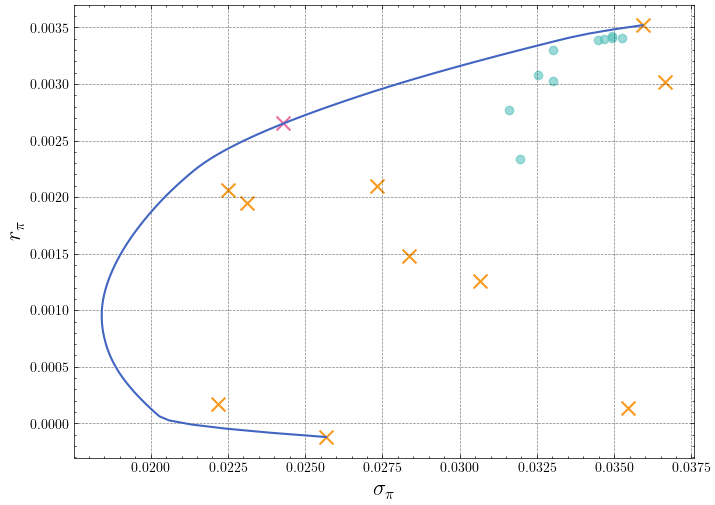

In [110]:
market.plot_efficient_frontier(stds = stds, returns = means)

## 15 Stocks 

[*********************100%***********************]  15 of 15 completed


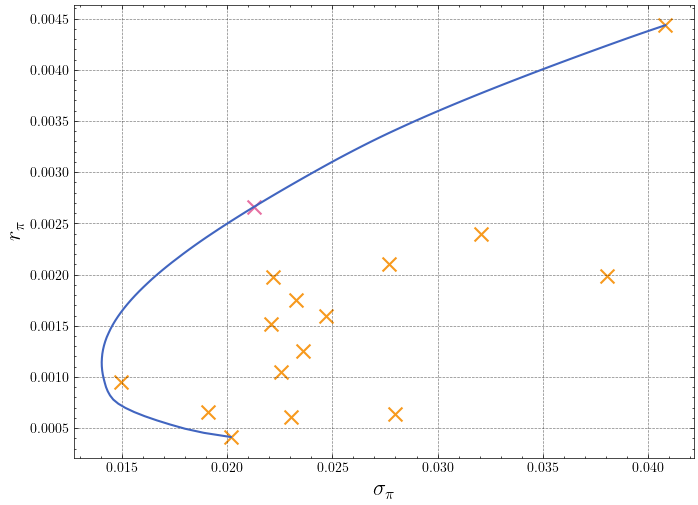

In [113]:
random.shuffle(stocks)
sampled_stocks_15 = stocks[:15]
factory = MarketFactory(sampled_stocks_15, "2019-04-30", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

In [115]:
params = {
    'n_assets': len(sampled_stocks_15),
    'α': 3,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.1,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 8500
}

p_runner = ParallelRunner(market.μ, market.Σ, 10, [params], 50, reward_mode='returns')
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 47.01it/s]
1it [06:44, 404.27s/it]


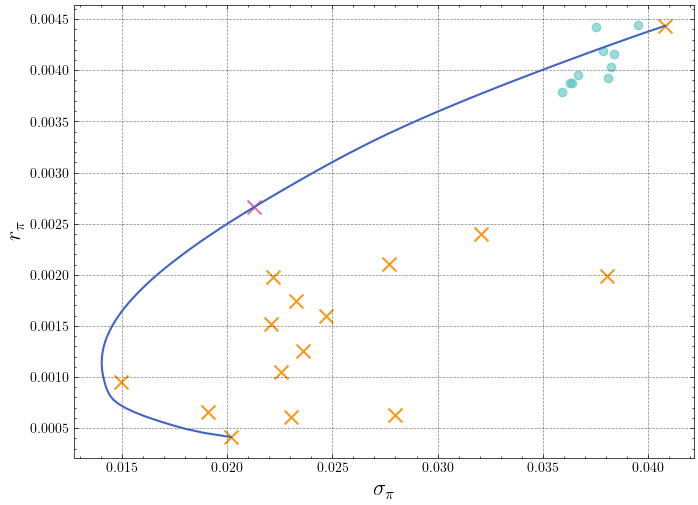

In [116]:
market.plot_efficient_frontier(stds = stds, returns = means)

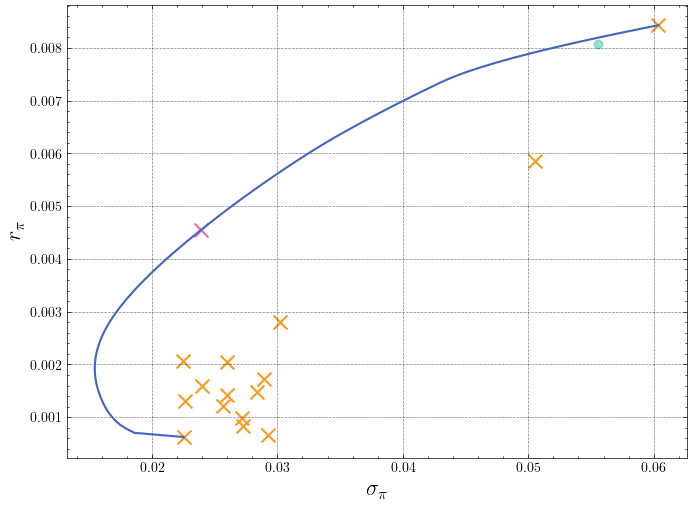

In [64]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=3, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

## 25 Stocks

[*********************100%***********************]  25 of 25 completed


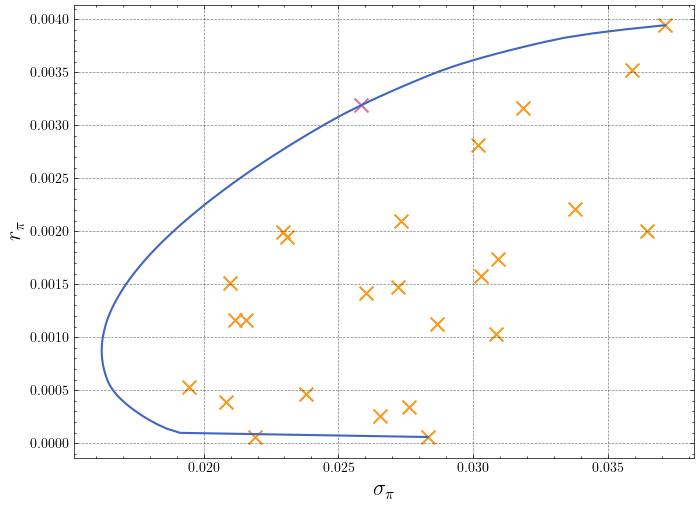

In [78]:
random.shuffle(stocks)
sampled_stocks = stocks[:25]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

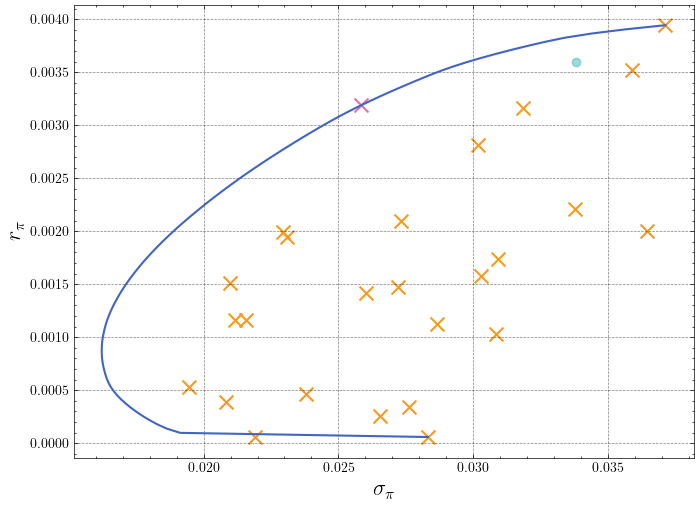

In [81]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=5, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

## 50 Stocks

[*********************100%***********************]  50 of 50 completed


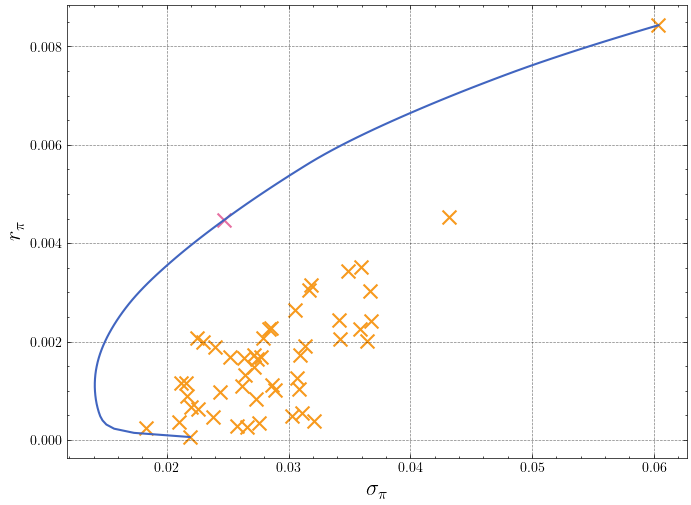

In [94]:
random.shuffle(stocks)
sampled_stocks = stocks[:50]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

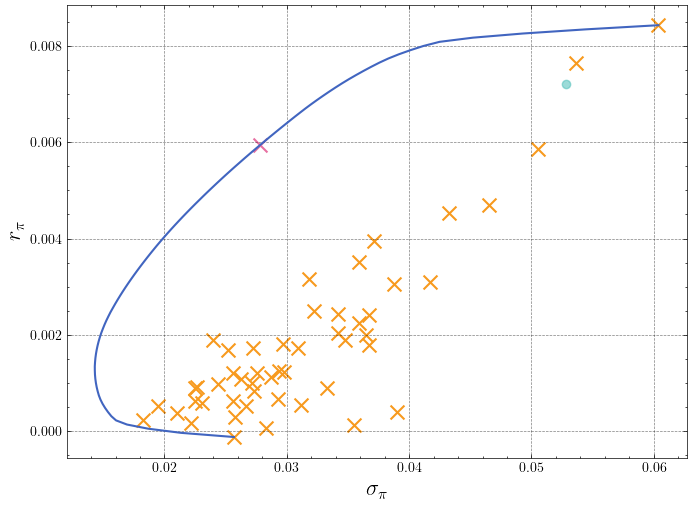

In [83]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=5, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

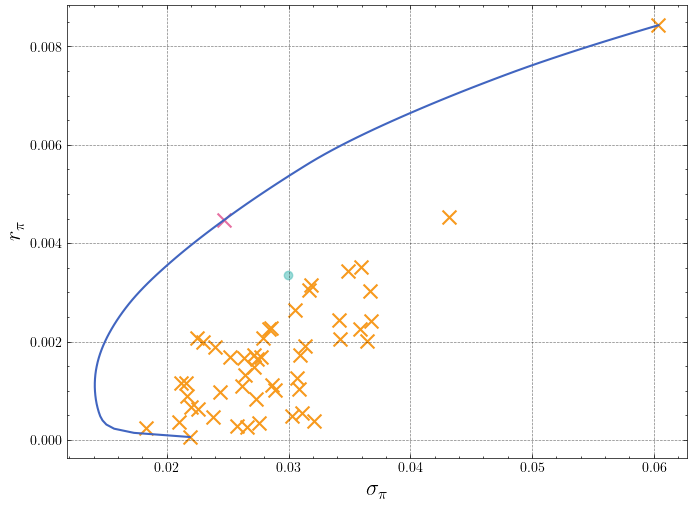

In [95]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=5, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

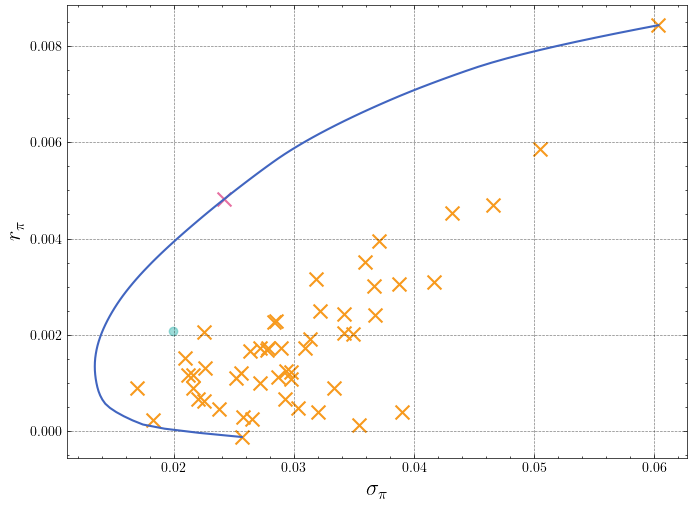

In [93]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=5, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

## 100 Stocks

[*********************100%***********************]  100 of 100 completed


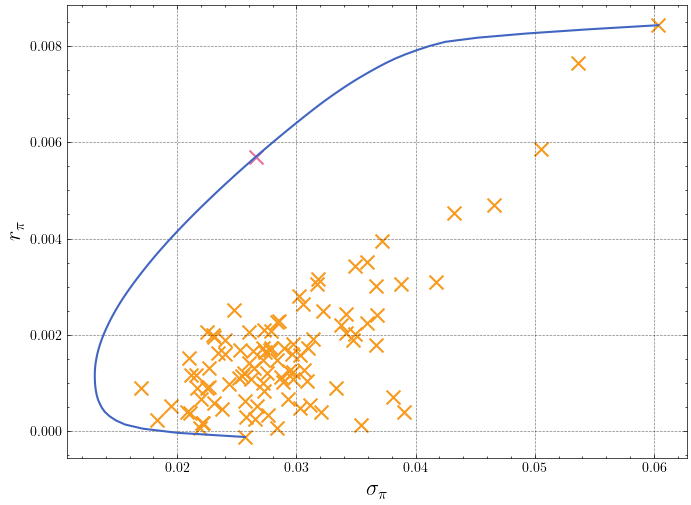

In [84]:
random.shuffle(stocks)
sampled_stocks = stocks[:100]
factory = MarketFactory(sampled_stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
market.plot_efficient_frontier()

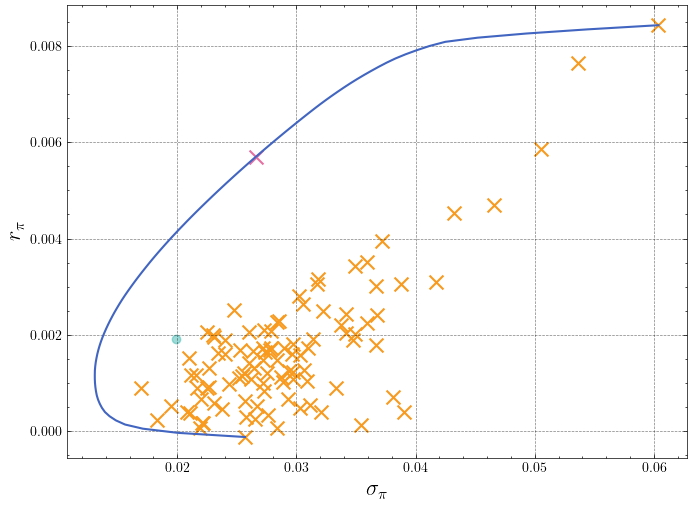

In [86]:
policy = DirichletPolicy(
    len(sampled_stocks),  α=7, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.1,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(market, policy, η=0.0001)
eps = 10000
harness.train(num_episodes=eps)
test_results = harness.test(100000)
market.plot_efficient_frontier(stds = np.std(test_results), returns = np.mean(test_results))

# Maximising the Differential Sharpe Ratio of Real Stocks

/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dirichlet/Harness.py:113: RuntimeWarning: invalid value encountered in double_scalars
  self._Dt = num / denom


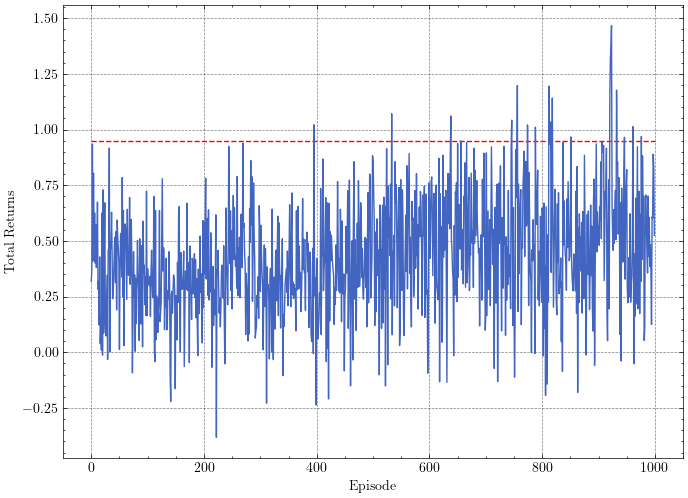

In [99]:
env = GenerativeMarketEnv(
    μ, 
    Σ
)


policy = DirichletPolicy(
    8,  α=0.06, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.6,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(env, policy, reward_mode='dsr', episode_length=100, η=0.01)
eps = 1000
harness.train(num_episodes=eps)
harness.plot_smooth_rewards(eps, window=1)

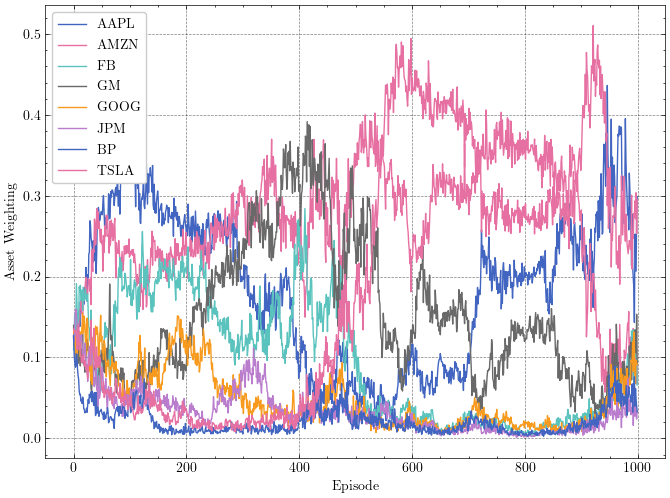

In [100]:
labels = ['AAPL', 'AMZN', 'FB', 'GM', 'GOOG', 'JPM', 'BP', 'TSLA']
harness.plot_weights_vs_ep(labels=labels)

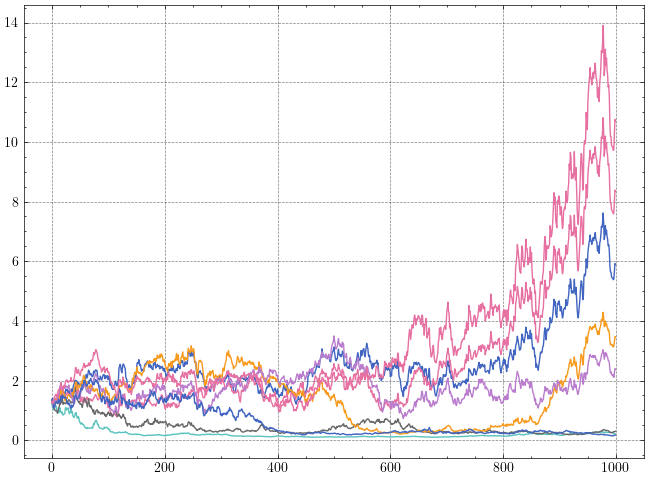

In [59]:
plt.subplots(figsize=(8, 6), dpi=100)
for i in range(8):
    plt.plot(np.arange(1000), np.array(harness.hist['a_ns'])[:,i])

/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/dirichlet/Harness.py:113: RuntimeWarning: invalid value encountered in double_scalars
  self._Dt = num / denom


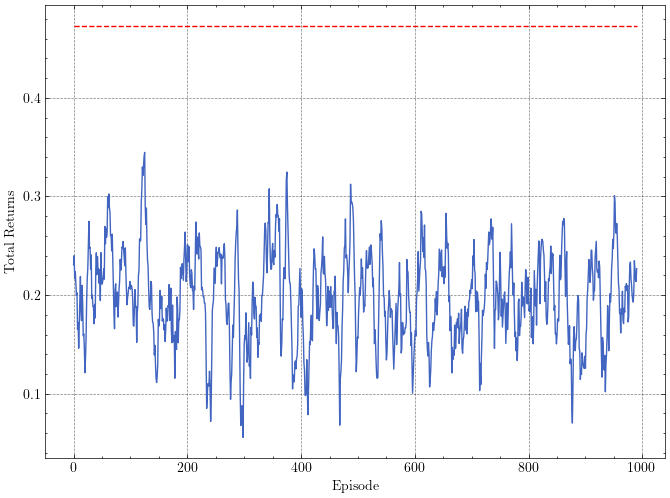

In [11]:
env = GenerativeMarketEnv(
    μ, 
    Σ
)

policy = DirichletPolicy(
    8,  α=0.09, α_end=8e-4, start_ep=9999, 
        α_decay_steps=9999, γ=0.6,
    grad_adpt_mode='natural_gradient', returns_adpt_mode=None,
    parameterisation='softplus'
)
harness = Harness(env, policy, reward_mode='dsr')
eps = 1000
harness.train(num_episodes=eps)
harness.plot_smooth_rewards(eps, window=10)

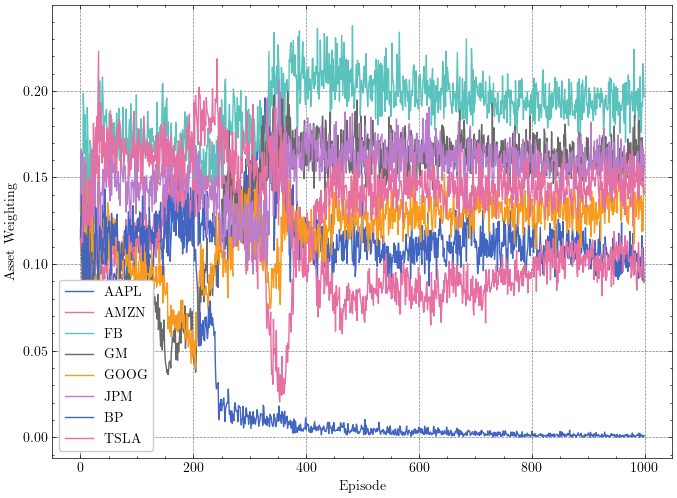

In [12]:
labels = ['AAPL', 'AMZN', 'FB', 'GM', 'GOOG', 'JPM', 'BP', 'TSLA']
harness.plot_weights_vs_ep(labels=labels)

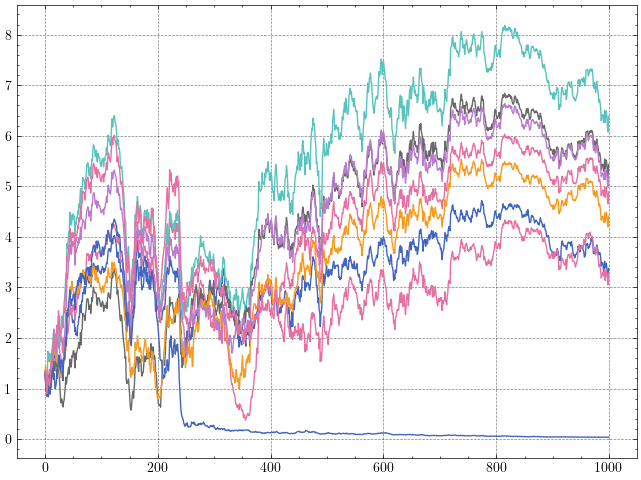

In [13]:
fig, ax_left = plt.subplots(figsize=(8, 6), dpi=100)
for i in range(8):
    plt.plot(np.arange(1000), np.array(harness.hist['a_ns'])[:,i])

In [16]:
n_s = len(μ)
A = opt.matrix(np.transpose(np.array(μ) )[None, :])
b = opt.matrix(np.array([1.]))
P = opt.matrix(Σ)
q = opt.matrix(np.zeros((n_s, 1)))
G = opt.matrix(-np.identity(n_s))
h = opt.matrix(np.zeros((n_s, 1)))
sol = opt.solvers.qp(P, q, G, h, A, b)
X = np.array(sol['x'])
X = X/sum(X)


     pcost       dcost       gap    pres   dres
 0:  1.2024e+01 -5.5921e+03  6e+03  0e+00  2e+02
 1:  1.2023e+01 -4.6094e+01  6e+01  1e-14  2e+00
 2:  1.1941e+01  9.5048e+00  2e+00  5e-15  6e-02
 3:  1.1518e+01  1.1049e+01  5e-01  8e-15  9e-03
 4:  1.1337e+01  1.1273e+01  6e-02  2e-14  3e-17
 5:  1.1313e+01  1.1308e+01  5e-03  2e-14  5e-17
 6:  1.1310e+01  1.1310e+01  3e-04  2e-14  3e-17
 7:  1.1310e+01  1.1310e+01  3e-05  1e-14  3e-17
 8:  1.1310e+01  1.1310e+01  4e-07  1e-14  5e-17
Optimal solution found.


In [17]:
X

array([[3.84819575e-02],
       [2.13956582e-01],
       [8.11650499e-09],
       [2.92700207e-01],
       [1.35759309e-01],
       [6.45133920e-06],
       [5.10208758e-10],
       [3.19095485e-01]])

In [18]:
def calculate_portfolio_volatility(X_b):
    σ_b = np.sqrt(X_b.T @ Σ @ X_b)
    return σ_b

def calculate_portfolio_return(X_b):
    R̄_b = μ @ X_b
    return R̄_b

In [7]:
params_1 = {
    'n_assets': 8,
    'α': 0.08,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.6,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 100, params, 100, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()

NameError: name 'μ' is not defined

In [27]:
calculate_portfolio_return(X)

array([0.00545424])

In [26]:
calculate_portfolio_volatility(X)

array([[0.02594078]])

In [31]:
calculate_portfolio_return(X)/calculate_portfolio_volatility(X)

array([[0.2102574]])

In [22]:
rrrs = harness.test(5000)

In [46]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

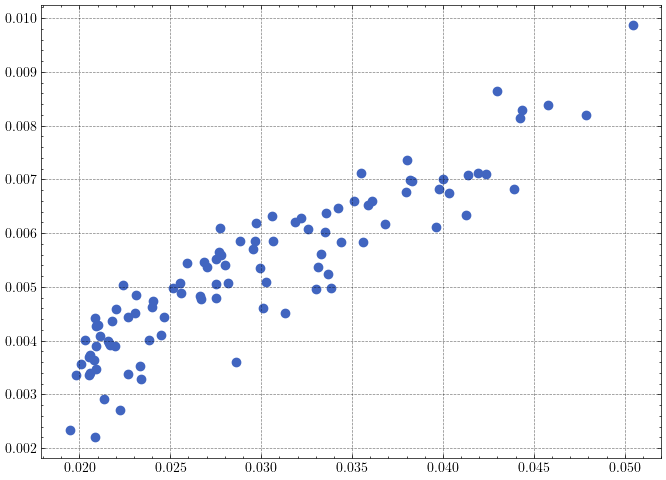

In [47]:
plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(stds, means)

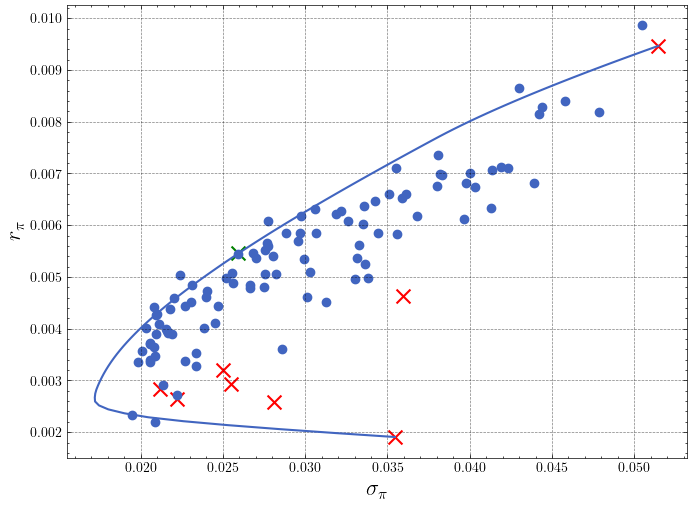

In [48]:
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

In [118]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.1)
p_runner.run_test()

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3263.80it/s]
1it [01:56, 116.44s/it]


In [119]:
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

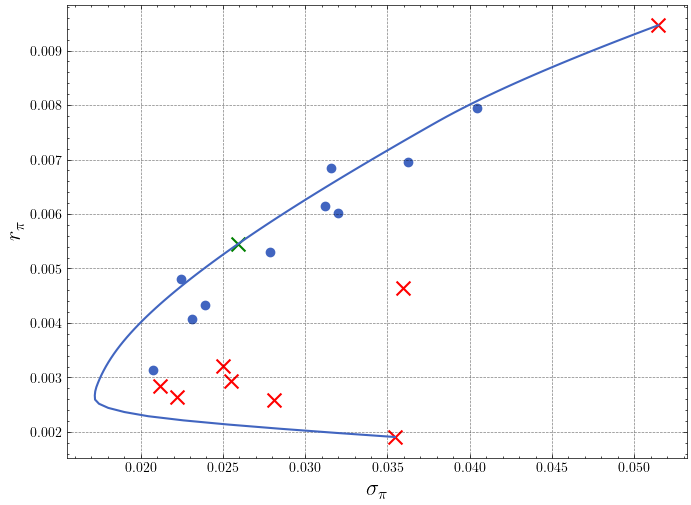

In [120]:
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 6023.70it/s]
1it [01:36, 96.57s/it]


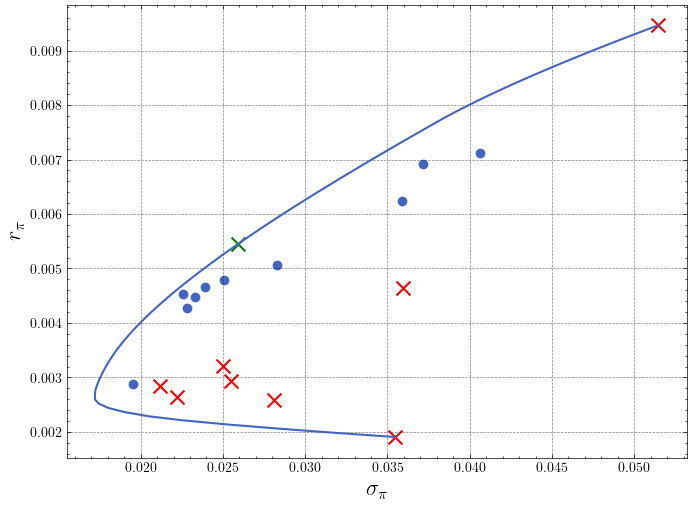

In [124]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.3)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 5288.49it/s]
1it [01:47, 107.03s/it]


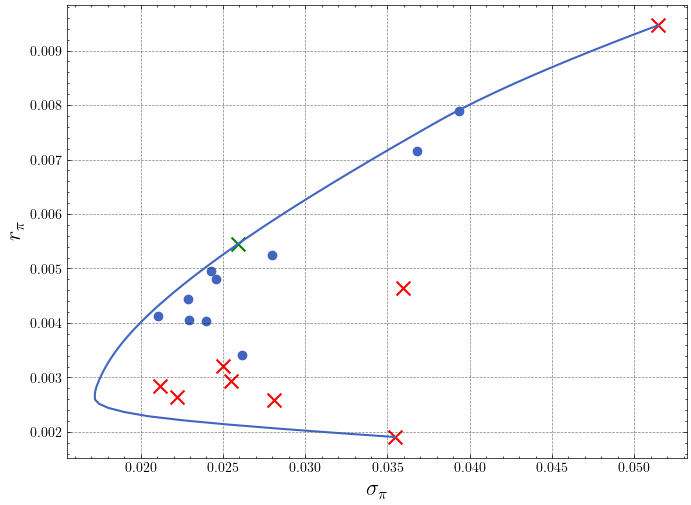

In [125]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.4)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3628.29it/s]
1it [01:50, 110.53s/it]


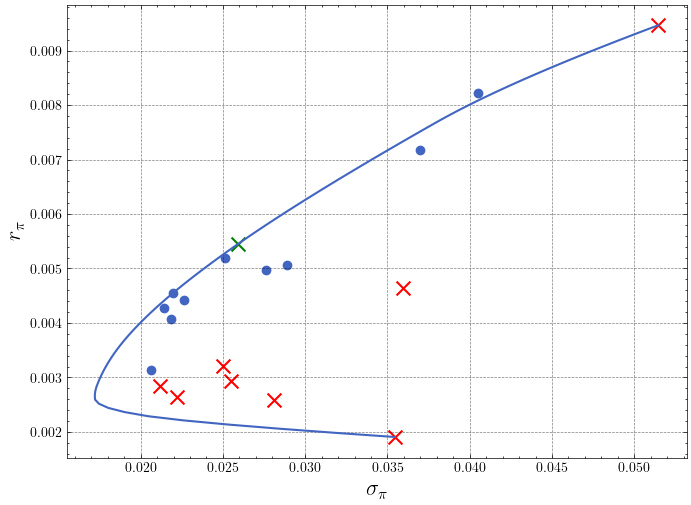

In [126]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.6)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 3082.46it/s]
1it [01:59, 119.69s/it]


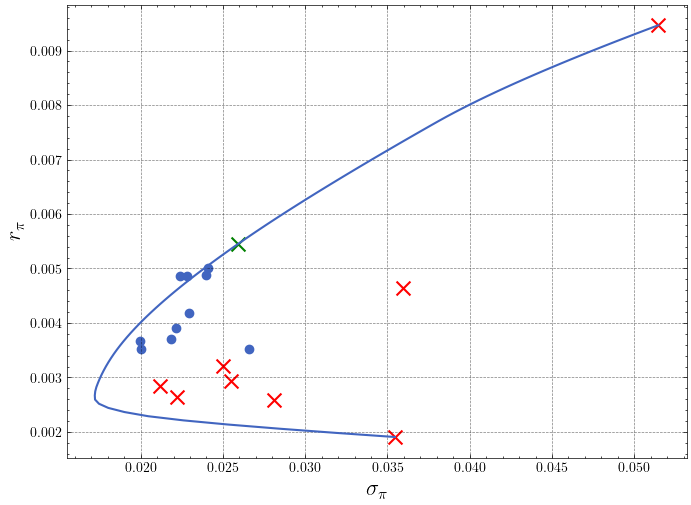

In [127]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 20/20 [02:01<00:00,  6.06s/it]
1it [03:46, 226.52s/it]


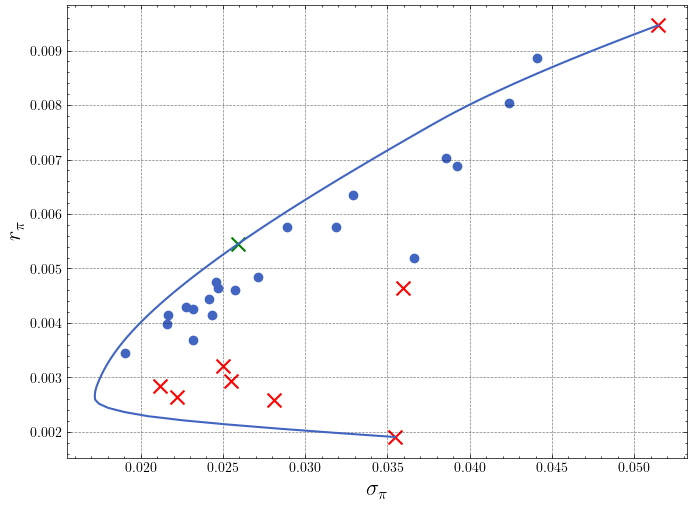

In [129]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 20, params, 100, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 2984.21it/s]
1it [01:46, 106.59s/it]


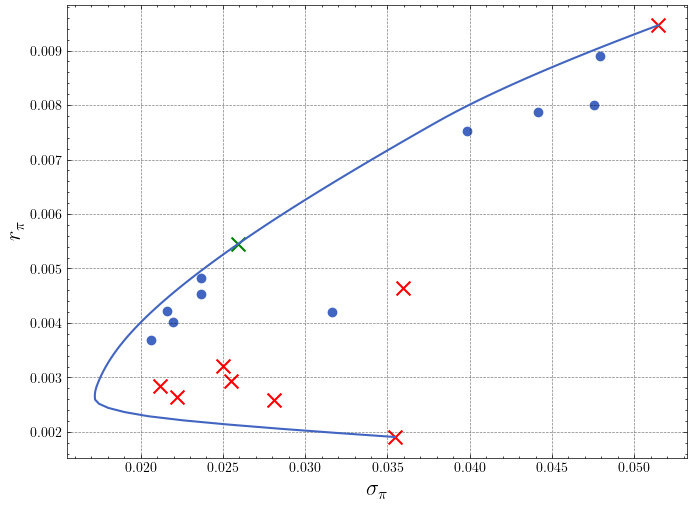

In [131]:
params_1 = {
    'n_assets': 8,
    'α': 0.06,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 53.07it/s]
1it [01:53, 113.35s/it]


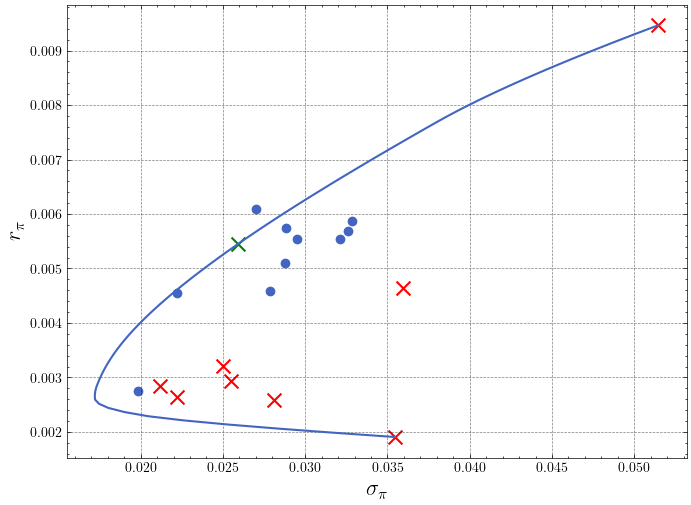

In [140]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 20/20 [01:43<00:00,  5.17s/it]
1it [03:37, 217.41s/it]


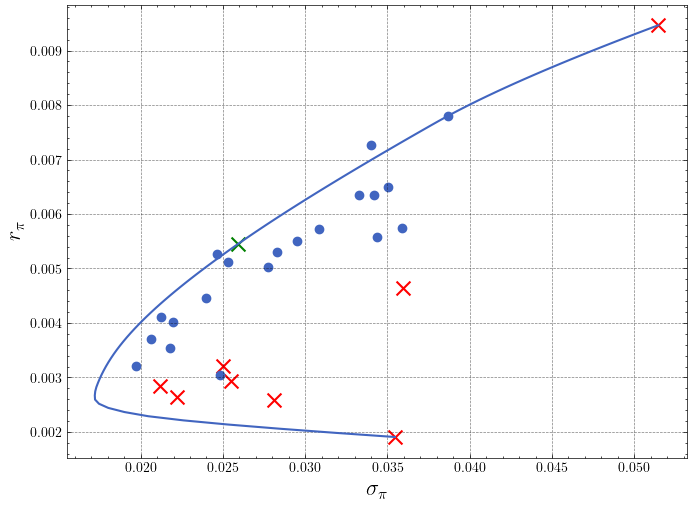

In [141]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 20, params, 100, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 20/20 [01:58<00:00,  5.94s/it]
1it [04:02, 242.21s/it]


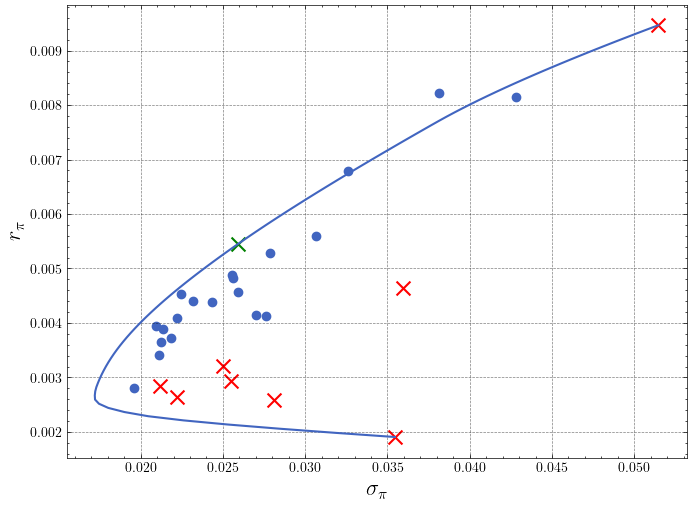

In [142]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 20, params, 100, legend_labels, reward_mode='dsr', η=0.8)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 2697.65it/s]
1it [01:41, 101.69s/it]


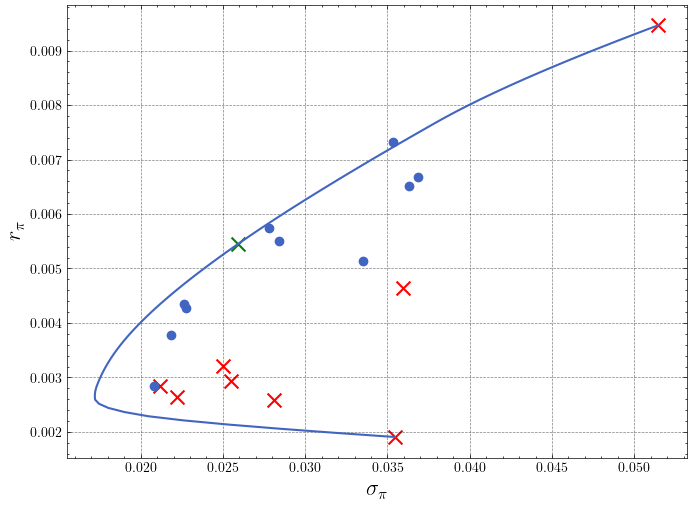

In [143]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 100, legend_labels, reward_mode='dsr', η=0.1)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 20/20 [01:00<00:00,  3.03s/it]
1it [02:13, 133.33s/it]


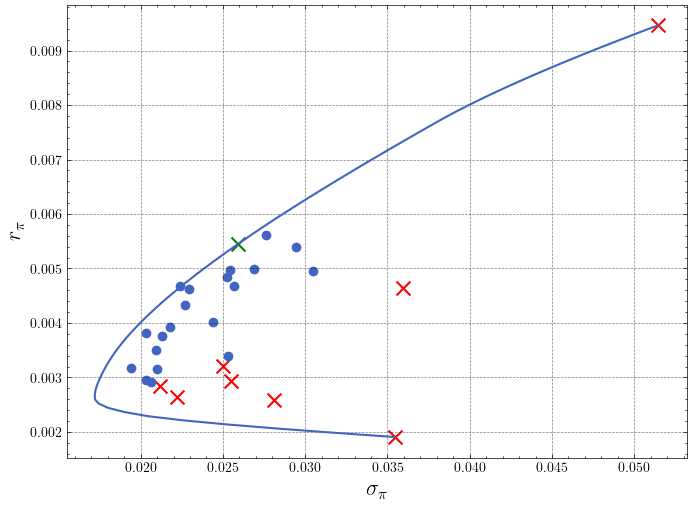

In [154]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 20, params, 50, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))
ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 100/100 [11:06<00:00,  6.67s/it]
1it [12:23, 743.65s/it]


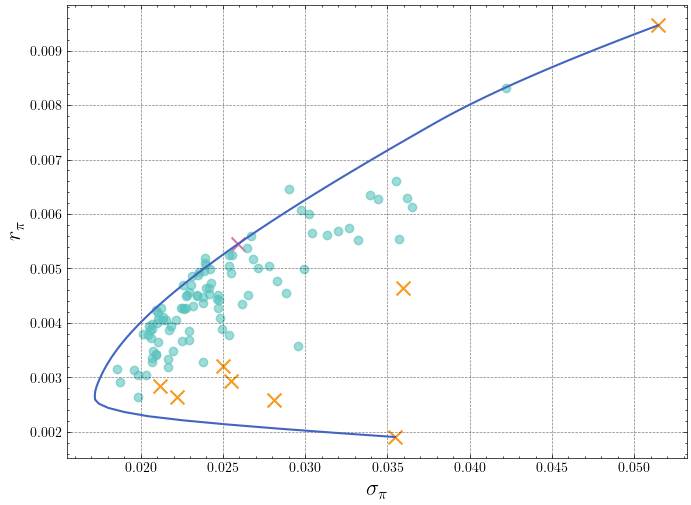

In [182]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 100, params, 50, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

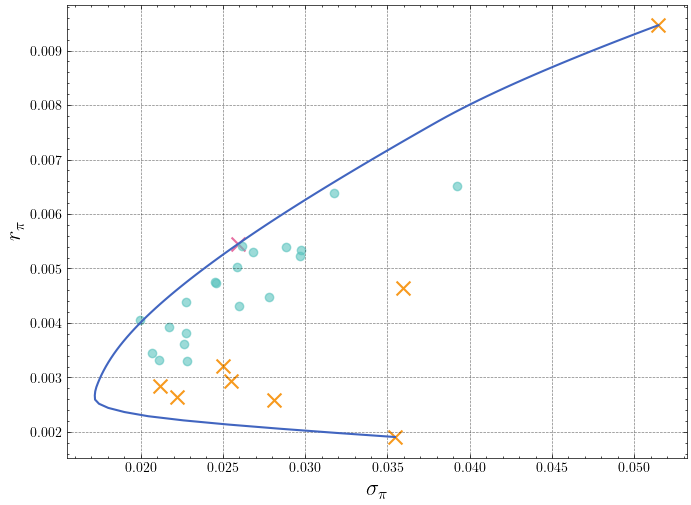

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 10/100 [00:00<00:01, 65.94it/s]

 10%|█         | 10/100 [00:13<00:01, 65.94it/s]

 20%|██        | 20/100 [01:08<02:44,  2.05s/it]

 30%|███       | 30/100 [02:06<03:43,  3.20s/it]

 40%|████      | 40/100 [03:06<04:01,  4.02s/it]

 50%|█████     | 50/100 [04:08<03:53,  4.68s/it]

 60%|██████    | 60/100 [05:11<03:26,  5.17s/it]

 70%|███████   | 70/100 [06:14<02:45,  5.51s/it]

 80%|████████  | 80/100 [07:19<01:56,  5.80s/it]

 90%|█████████ | 90/100 [08:23<00:59,  5.98s/it]

100%|██████████| 100/100 [09:28<00:00,  5.68s/it]
1it [10:44, 644.74s/it]


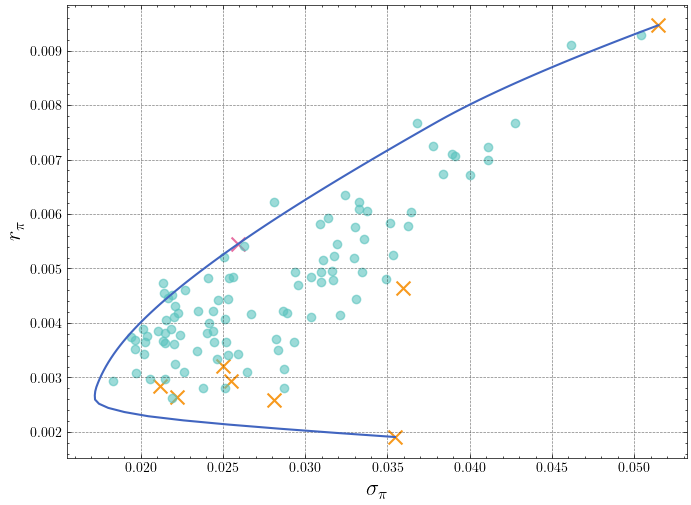

In [184]:
params_1 = {
    'n_assets': 8,
    'α': 0.08,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': None,
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 100, params, 50, legend_labels, reward_mode='dsr', η=0.05)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

 10%|█         | 10/100 [00:00<00:01, 61.16it/s]

 10%|█         | 10/100 [00:17<00:01, 61.16it/s]

 20%|██        | 20/100 [01:23<03:22,  2.53s/it]

 30%|███       | 30/100 [02:34<04:32,  3.89s/it]

 40%|████      | 40/100 [03:37<04:36,  4.61s/it]

 50%|█████     | 50/100 [04:33<04:05,  4.90s/it]

 60%|██████    | 60/100 [05:27<03:22,  5.06s/it]

 70%|███████   | 70/100 [06:22<02:35,  5.17s/it]

 80%|████████  | 80/100 [07:16<01:45,  5.26s/it]

 90%|█████████ | 90/100 [08:12<00:53,  5.36s/it]

100%|██████████| 100/100 [09:06<00:00,  5.47s/it]
1it [10:09, 609.40s/it]


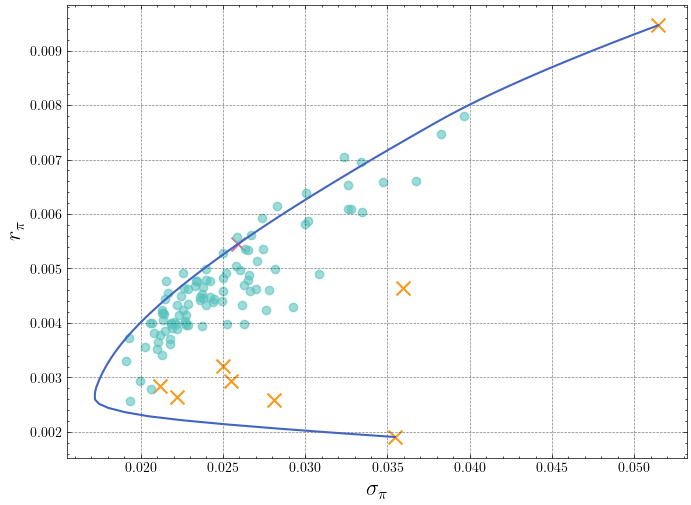

In [190]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 100, params, 50, legend_labels, reward_mode='dsr', η=0.5)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


 20%|██        | 10/50 [00:00<00:00, 58.86it/s]


 20%|██        | 10/50 [00:16<00:00, 58.86it/s]


 40%|████      | 20/50 [01:01<00:55,  1.84s/it]


 60%|██████    | 30/50 [01:58<00:59,  3.00s/it]


 80%|████████  | 40/50 [02:51<00:36,  3.70s/it]


100%|██████████| 50/50 [03:44<00:00,  4.49s/it]
1it [04:41, 281.48s/it]


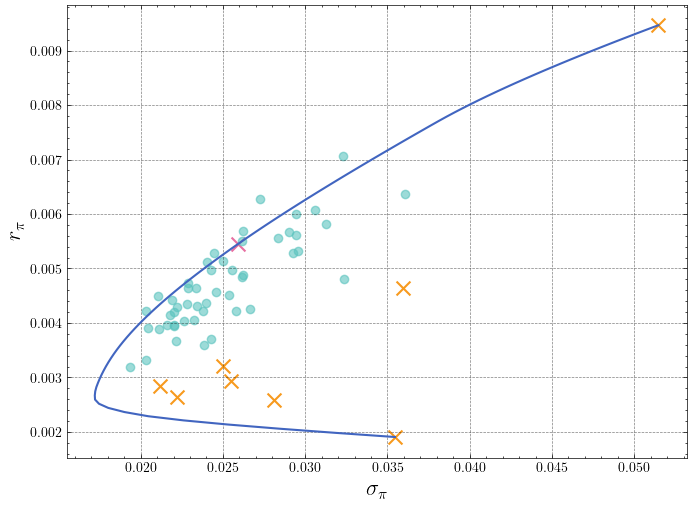

In [192]:
params_1 = {
    'n_assets': 8,
    'α': 0.04,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 1500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 50, params, 50, legend_labels, reward_mode='dsr', η=0.4)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


 40%|████      | 20/50 [01:42<02:33,  5.11s/it]


 60%|██████    | 30/50 [03:13<02:06,  6.32s/it]


 80%|████████  | 40/50 [04:43<01:11,  7.13s/it]


100%|██████████| 50/50 [05:59<00:00,  7.18s/it]
1it [07:10, 430.89s/it]


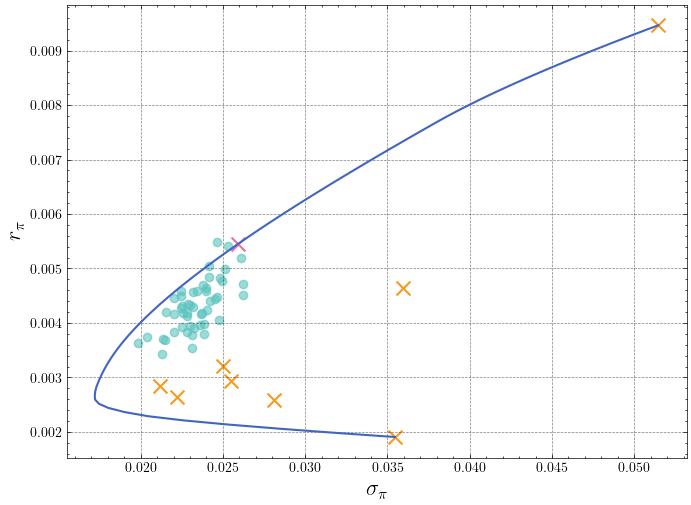

In [194]:
params_1 = {
    'n_assets': 8,
    'α': 0.01,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 50, params, 50, legend_labels, reward_mode='dsr', η=0.45)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]


  0%|          | 0/50 [00:00<?, ?it/s]


 20%|██        | 10/50 [00:00<00:00, 74.76it/s]


 20%|██        | 10/50 [00:19<00:00, 74.76it/s]


 40%|████      | 20/50 [01:14<01:06,  2.23s/it]


 60%|██████    | 30/50 [02:24<01:13,  3.67s/it]


 80%|████████  | 40/50 [03:34<00:46,  4.67s/it]


100%|██████████| 50/50 [04:43<00:00,  5.68s/it]
1it [05:54, 354.80s/it]


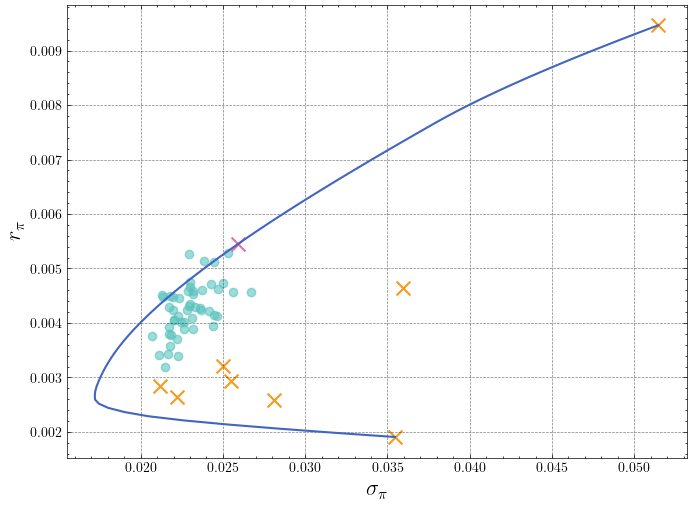

In [195]:
params_1 = {
    'n_assets': 8,
    'α': 0.01,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 50, params, 50, legend_labels, reward_mode='dsr', η=0.45)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 100/100 [11:15<00:00,  6.75s/it]
1it [12:40, 760.64s/it]


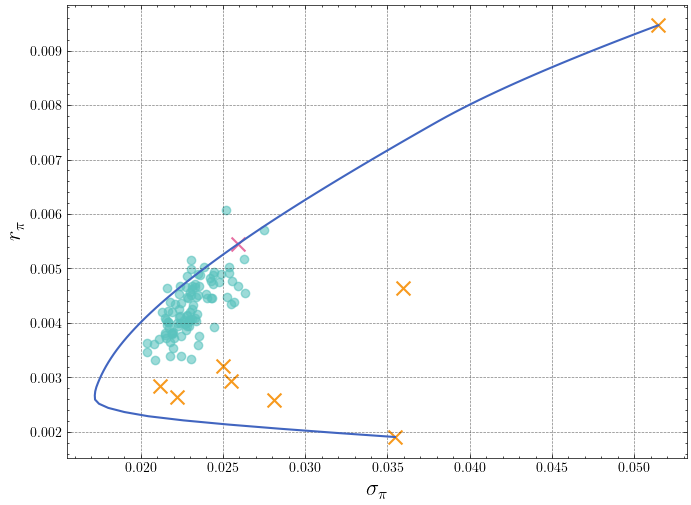

In [197]:
params_1 = {
    'n_assets': 8,
    'α': 0.01,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 100, params, 50, legend_labels, reward_mode='dsr', η=0.45)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]
100%|██████████| 10/10 [00:00<00:00, 1393.18it/s]
1it [01:36, 96.93s/it]


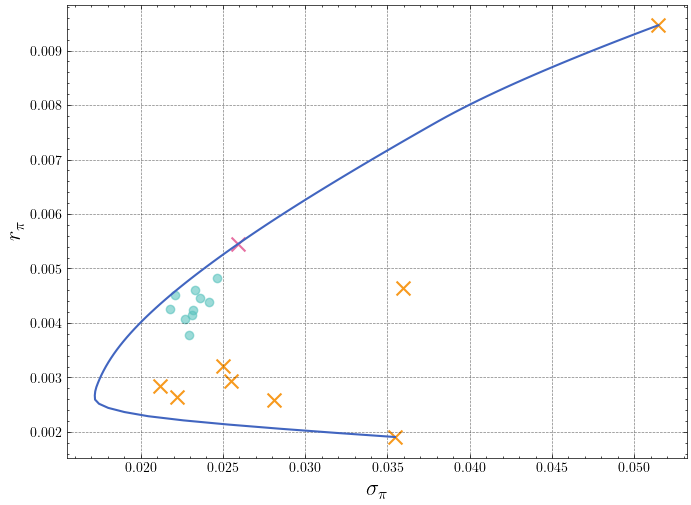

In [199]:
params_1 = {
    'n_assets': 8,
    'α': 0.008,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 2500
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 10, params, 50, legend_labels, reward_mode='dsr', η=0.45)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

0it [00:00, ?it/s]



  0%|          | 0/50 [00:00<?, ?it/s]



 20%|██        | 10/50 [00:00<00:00, 66.58it/s]



 20%|██        | 10/50 [00:15<00:00, 66.58it/s]



 40%|████      | 20/50 [01:50<01:39,  3.32s/it]



 60%|██████    | 30/50 [03:33<01:48,  5.40s/it]



 80%|████████  | 40/50 [05:22<01:10,  7.08s/it]



100%|██████████| 50/50 [07:32<00:00,  9.05s/it]
1it [09:19, 559.45s/it]


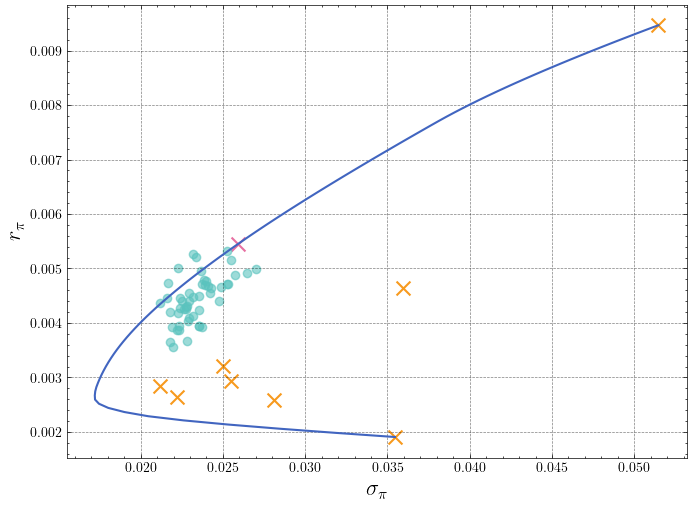

In [212]:
params_1 = {
    'n_assets': 8,
    'α': 0.008,
    'α_end': 9e-3,
    'start_ep': 9999, 
    'α_decay_steps': 9999,
    'γ': 0.8,
    'grad_adpt_mode': 'natural_gradient',
    'returns_adpt_mode': 'avg_r_baseline',
    'parameterisation': 'softplus',
    'eps': 3000
}



legend_labels = {'0': 'DSR'}

params = [params_1]
p_runner = ParallelRunner(μ, Σ, 50, params, 50, legend_labels, reward_mode='dsr', η=0.45)
p_runner.run_test()
means = []
stds = []
for i in range(len(p_runner.results['0'])):
    means.append(np.mean(p_runner.results['0'][i]))
    stds.append(np.std(p_runner.results['0'][i]))

ef = EfficientFrontier.from_sample_statistics(np.array(μ), np.array(Σ))
plt.figure(figsize=(8, 6), dpi=100)
ef.plot_frontier(allow_shorts=False, allow_lending=False, stds=stds, means=means)

In [217]:
sharpes = np.array(means)/np.array(stds)

In [220]:
theoretical_optimal = 0.0055/0.026

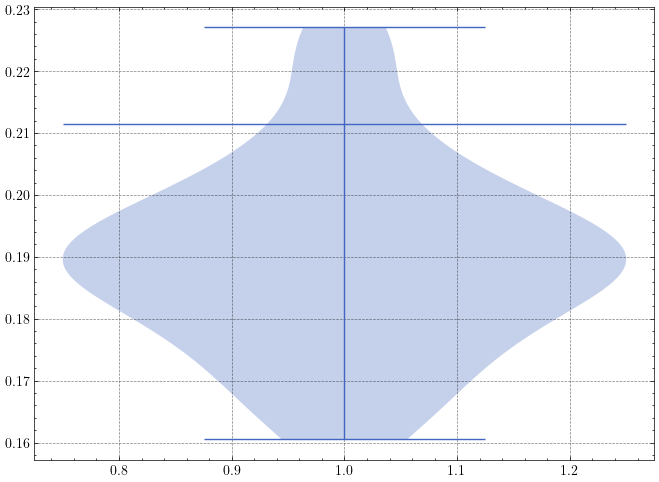

In [229]:
plt.figure(figsize=(8, 6), dpi=100)
plt.violinplot(sharpes);
plt.hlines(theoretical_optimal, 0.75, 1.25)

# Market Factory

In [238]:
sys.path.insert(4, os.path.abspath('../../src/rl/environments/'))
from MarketFactory import MarketFactory

In [239]:
importlib.reload(sys.modules['MarketFactory'])

<module 'MarketFactory' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/environments/MarketFactory.py'>

In [251]:
stocks = ['AAPL', 'AMZN', 'FB', 'GM', 'GOOG', 'JPM', 'BP', 'TSLA']


[*********************100%***********************]  8 of 8 completed


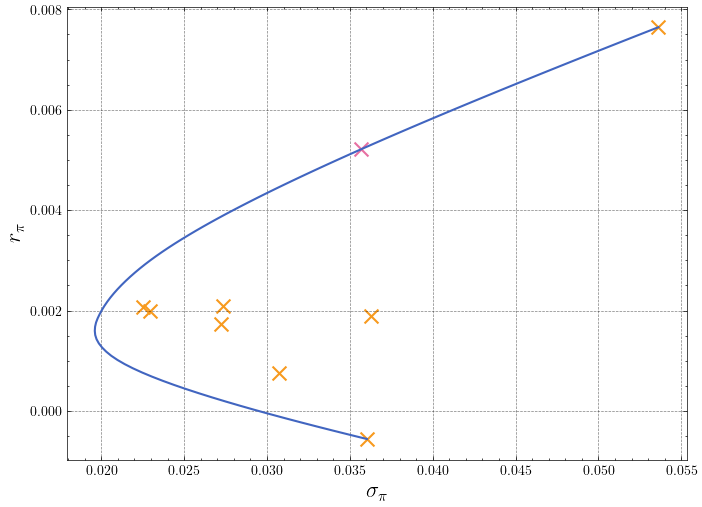

In [252]:
factory = MarketFactory(stocks, "2020-01-01", "2021-04-30")
market = factory.create_market()
ef = EfficientFrontier.from_sample_statistics(market.μ, market.Σ)
ef.plot_frontier(allow_shorts=False, allow_lending=False)